In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math
import seaborn as sns

import openmc 

sns.set_style("ticks")

# sns.set_style("darkgrid")
# # sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

In [2]:
def orderOfMagnitude(number):
    return math.floor(math.log(number, 10))

In [3]:
# read measured files
tab1_measured_nb = pd.read_csv('tab1_measured_nb.csv')
tab1_measured_al = pd.read_csv('tab1_measured_al.csv')
tab1_measured_ni = pd.read_csv('tab1_measured_ni.csv')
tab1_measured_au = pd.read_csv('tab1_measured_au.csv')
#
tab2_measured_nb = pd.read_csv('tab2_measured_nb.csv')
tab2_measured_al = pd.read_csv('tab2_measured_al.csv')
tab2_measured_ni = pd.read_csv('tab2_measured_ni.csv')
tab2_measured_au = pd.read_csv('tab2_measured_au.csv')
#
tab3_measured_nb = pd.read_csv('tab3_measured_nb.csv')
tab3_measured_al = pd.read_csv('tab3_measured_al.csv')
tab3_measured_ni = pd.read_csv('tab3_measured_ni.csv')
tab3_measured_au = pd.read_csv('tab3_measured_au.csv')
#
heating_measured = pd.read_csv('heating_measured.csv')

In [4]:
# read mcnp files
tab1_mcnp_nb = pd.read_csv('tab1_mcnp_nb.csv')
tab1_mcnp_al = pd.read_csv('tab1_mcnp_al.csv')
tab1_mcnp_ni = pd.read_csv('tab1_mcnp_ni.csv')
tab1_mcnp_au = pd.read_csv('tab1_mcnp_au.csv')
#
tab2_mcnp_nb = pd.read_csv('tab2_mcnp_nb.csv')
tab2_mcnp_al = pd.read_csv('tab2_mcnp_al.csv')
tab2_mcnp_ni = pd.read_csv('tab2_mcnp_ni.csv')
tab2_mcnp_au = pd.read_csv('tab2_mcnp_au.csv')
#
tab3_mcnp_nb = pd.read_csv('tab3_mcnp_nb.csv')
tab3_mcnp_al = pd.read_csv('tab3_mcnp_al.csv')
tab3_mcnp_ni = pd.read_csv('tab3_mcnp_ni.csv')
tab3_mcnp_au = pd.read_csv('tab3_mcnp_au.csv')
#
heating_mcnp_eff3 = pd.read_csv('heating_mcnp_eff3.csv')
heating_mcnp_fendl1 = pd.read_csv('heating_mcnp_fendl1.csv')
heating_mcnp_fendl2 = pd.read_csv('heating_mcnp_fendl2.csv')

In [5]:
# read results from OpenMC simulations

# ON-AXIS results
omc_sp_nb = openmc.StatePoint('statepoint.100.h5')
omc_sp_al = openmc.StatePoint('statepoint.100.h5')
omc_sp_ni = openmc.StatePoint('statepoint_ni10b.100.h5')
omc_sp_au = openmc.StatePoint('statepoint.100.h5')

# detector_reaction_rate_nb = omc_sp_nb.get_tally(name='nb93_irdff_rr').get_pandas_dataframe()
# detector_reaction_rate_al = omc_sp_al.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_ni = omc_sp_ni.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
# detector_reaction_rate_au = omc_sp_au.get_tally(name='detector_reaction_rate').get_pandas_dataframe()

# omc_nb = detector_reaction_rate_nb.loc[(detector_reaction_rate_nb['particle'] == 'neutron')]
# omc_al = detector_reaction_rate_al.loc[(detector_reaction_rate_al['nuclide'] == 'Al27') & (detector_reaction_rate_al['score'] == '(n,a)')]
omc_ni = detector_reaction_rate_ni.loc[(detector_reaction_rate_ni['nuclide'] == 'Ni58') & (detector_reaction_rate_ni['score'] == '(n,p)')]
# omc_au = detector_reaction_rate_au.loc[(detector_reaction_rate_au['nuclide'] == 'Au197') & (detector_reaction_rate_au['score'] == '(n,gamma)')]


detector_reaction_rate_nb = omc_sp_nb.get_tally(name='nb93_irdff_rr').get_pandas_dataframe()
detector_reaction_rate_al = omc_sp_al.get_tally(name='al27_irdff_rr').get_pandas_dataframe()
# detector_reaction_rate_ni = omc_sp_ni.get_tally(name='ni58_irdff_rr').get_pandas_dataframe()
detector_reaction_rate_au = omc_sp_au.get_tally(name='au197_irdff_rr').get_pandas_dataframe()

omc_nb = detector_reaction_rate_nb.loc[(detector_reaction_rate_nb['particle'] == 'neutron')]
omc_al = detector_reaction_rate_al.loc[(detector_reaction_rate_nb['particle'] == 'neutron')]
# omc_ni = detector_reaction_rate_ni.loc[(detector_reaction_rate_nb['particle'] == 'neutron')]
omc_au = detector_reaction_rate_au.loc[(detector_reaction_rate_nb['particle'] == 'neutron')]



In [6]:
# OFF-AXIS results
omc_sp_nb_oa = openmc.StatePoint('statepoint_nb100m_offaxis.100.h5')
omc_sp_al_oa = openmc.StatePoint('statepoint_al10b_offaxis.100.h5')
omc_sp_ni_oa = openmc.StatePoint('statepoint_ni10b_offaxis.100.h5')
omc_sp_au_oa = openmc.StatePoint('statepoint_au10b_offaxis.100.h5')

detector_reaction_rate_nb_oa = omc_sp_nb_oa.get_tally(name='nb93_irdff_rr').get_pandas_dataframe()
detector_reaction_rate_al_oa = omc_sp_al_oa.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_ni_oa = omc_sp_ni_oa.get_tally(name='detector_reaction_rate').get_pandas_dataframe()
detector_reaction_rate_au_oa = omc_sp_au_oa.get_tally(name='detector_reaction_rate').get_pandas_dataframe()

omc_nb_oa = detector_reaction_rate_nb_oa.loc[(detector_reaction_rate_nb_oa['particle'] == 'neutron')]
omc_al_oa = detector_reaction_rate_al_oa.loc[(detector_reaction_rate_al_oa['nuclide'] == 'Al27') & (detector_reaction_rate_al_oa['score'] == '(n,a)')]
omc_ni_oa = detector_reaction_rate_ni_oa.loc[(detector_reaction_rate_ni_oa['nuclide'] == 'Ni58') & (detector_reaction_rate_ni_oa['score'] == '(n,p)')]
omc_au_oa = detector_reaction_rate_au_oa.loc[(detector_reaction_rate_au_oa['nuclide'] == 'Au197') & (detector_reaction_rate_au_oa['score'] == '(n,gamma)')]

In [7]:
heating_sp = openmc.StatePoint('statepoint_heating20b.100.h5')
heating_omc = heating_sp.get_tally(name='heating_dose').get_pandas_dataframe()

In [8]:
# selecting cell for different tables:
tab1_cell = [135, 158, 181, 204, 602, 239, 262, 285, 308, 331, 363, 386, 398]
tab2_cell = [605, 606, 607, 608, 609, 610, 611, 612, 602, 603, 604]
tab3_cell = [135, 158, 181, 204, 605, 606, 607, 608, 609, 610, 611, 612, 602, 603, 604]
#
tab1_omc_nb = omc_nb[omc_nb['cell'].isin(tab1_cell)]
tab2_omc_nb = omc_nb[omc_nb['cell'].isin(tab2_cell)]
tab3_omc_nb = omc_nb_oa[omc_nb_oa['cell'].isin(tab3_cell)]
#
tab1_omc_al = omc_al[omc_al['cell'].isin(tab1_cell)]
tab2_omc_al = omc_al[omc_al['cell'].isin(tab2_cell)]
tab3_omc_al = omc_al_oa[omc_al_oa['cell'].isin(tab3_cell)]
#
tab1_omc_ni = omc_ni[omc_ni['cell'].isin(tab1_cell)]
tab2_omc_ni = omc_ni[omc_ni['cell'].isin(tab2_cell)]
tab3_omc_ni = omc_ni_oa[omc_ni_oa['cell'].isin(tab3_cell)]
#
tab1_omc_au = omc_au[omc_au['cell'].isin(tab1_cell)]
tab2_omc_au = omc_au[omc_au['cell'].isin(tab2_cell)]
tab3_omc_au = omc_au_oa[omc_au_oa['cell'].isin(tab3_cell)]

In [9]:
# actual density
foil_volume = .1 * 1.8**2/4 * np.pi

tab1_volumes = np.concatenate((np.ones(5), np.ones(4)*2, np.ones(4)*3)) * foil_volume
tab2_volumes = np.ones(11) * foil_volume
tab3_volumes = np.ones(15) * foil_volume

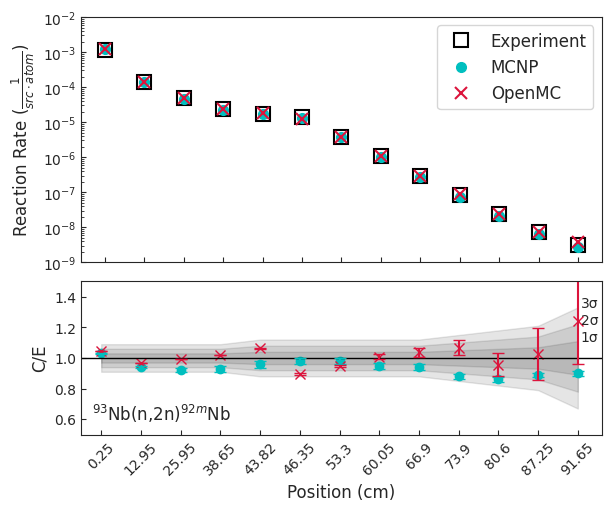

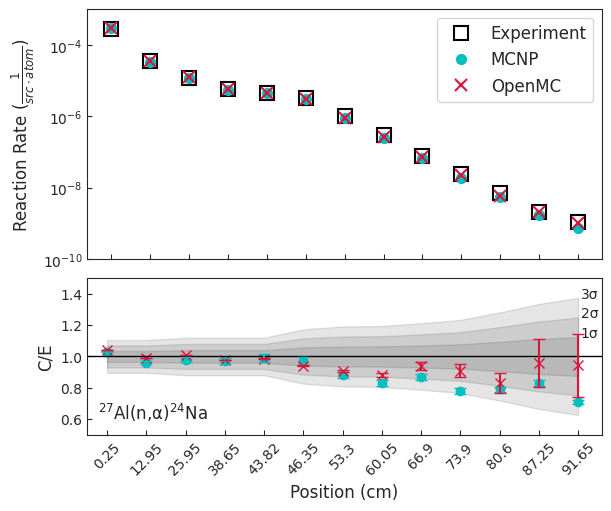

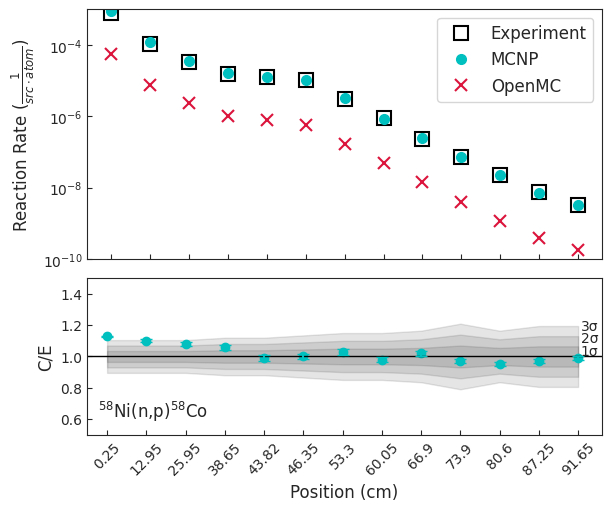

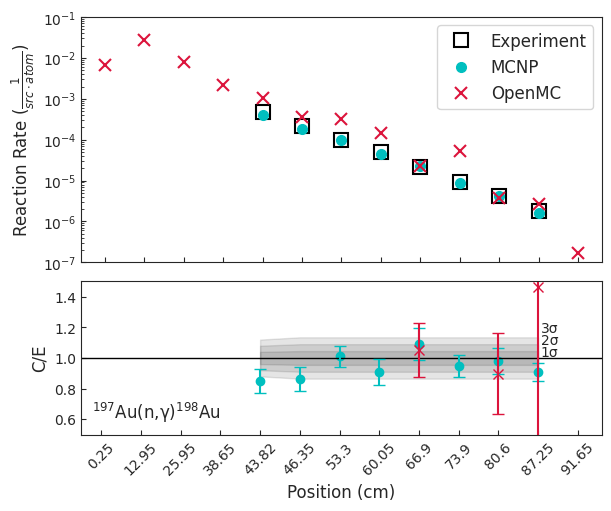

In [10]:
my_xticks = np.arange(len(tab1_measured_nb))
my_xlabels = tab1_measured_nb['y(cm)']
# tab1_omc_coeff = [1/density/tab1_volumes for density in [1, 0.06222, 0.06026, 0.05901*0.05]]
tab1_omc_coeff = [1/density/tab1_volumes for density in [1, 1, 1, 1]]

tab1_measured = [tab1_measured_nb, tab1_measured_al, tab1_measured_ni, tab1_measured_au]
tab1_mcnp = [tab1_mcnp_nb, tab1_mcnp_al, tab1_mcnp_ni, tab1_mcnp_au]
tab1_omc = [tab1_omc_nb, tab1_omc_al, tab1_omc_ni, tab1_omc_au]
reaction_labels = ['$^{93}$Nb(n,2n)$^{92m}$Nb', '$^{27}$Al(n,\u03B1)$^{24}$Na', '$^{58}$Ni(n,p)$^{58}$Co', '$^{197}$Au(n,\u03B3)$^{198}$Au']
filename_label = ['nb', 'al', 'ni', 'au']

for i,coeff in enumerate(tab1_omc_coeff):

    # get all values in plot-friendly format
    exp_mean = np.array(tab1_measured[i]['E'])
    exp_stddev = np.array(tab1_measured[i]['Error on E'])
    exp_rstddev = np.array(tab1_measured[i]['Error on E']/tab1_measured[i]['E'])
    mcnp_mean = np.array(tab1_mcnp[i]['C FENDL-1'])
    mcnp_stddev = np.array(tab1_mcnp[i]['FENDL-1 err'])
    mcnp_rstddev = mcnp_stddev / mcnp_mean
    mcnp_ce = np.array(tab1_mcnp[i]['C/E FEN-1'])
    omc_mean = np.array(tab1_omc[i]['mean'])*coeff
    omc_stddev = np.array(tab1_omc[i]['std. dev.'])*coeff
    omc_rstddev = omc_stddev / omc_mean
    omc_ce = omc_mean / exp_mean

    # min value and max value for rr floor and ceiling
    min_value = min(np.nanmin(exp_mean), np.nanmin(mcnp_mean), np.nanmin(omc_mean))
    max_value = max(np.nanmax(exp_mean), np.nanmax(mcnp_mean), np.nanmax(omc_mean))
    min_oom = orderOfMagnitude(min_value)
    max_oom = orderOfMagnitude(max_value)
    floor = 10**(min_oom)
    ceiling = 10**(max_oom+1)

    # get index of last valied value for measured data for placing 1,2,3sigma strings near the grey areas
    sigma_index = (~np.isnan(exp_mean)).cumsum(0).argmax(0)
    last_sigma = exp_rstddev[sigma_index]
    sigma_start = 1.

    # plot
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
    ax1.plot(my_xticks, exp_mean, marker='s', ms=10, ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')
    ax1.plot(my_xticks, mcnp_mean, marker='o', ms=7, ls='none', alpha=1, color='c', label='MCNP')
    ax1.plot(my_xticks, omc_mean, marker='x', ms=8, mew=1.5, ls='none', color='crimson', zorder=4, label='OpenMC')
    ax1.set_yscale('log')
    ax1.set_ylim([floor, ceiling])
    
    # # gridlines
    # ax1.grid(True, which="both", axis='y', ls="-")
    # locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1), numticks=10)  
    # ax1.xaxis.set_minor_locator(locmin)

    ax1.set_xticks(my_xticks)
    ax1.tick_params(axis='x', labelbottom=False)
    ax1.tick_params(axis='both', which='both', direction='in')
    ax1.legend(frameon=True, fontsize=12)
    ax1.set_ylabel(r'Reaction Rate $(\frac{1}{src \cdot atom})$', fontsize=12)
    #
    ax2.fill_between(my_xticks, 1 - exp_rstddev, 1 + exp_rstddev, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 2*exp_rstddev, 1 + 2*exp_rstddev, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 3*exp_rstddev, 1 + 3*exp_rstddev, color='k', alpha=.1)
    if last_sigma < .08:
        last_sigma = .08
        sigma_start = .93
    ax2.annotate('1\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 1*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('2\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 2*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('3\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 3*last_sigma], fontsize=10, clip_on=False)
    ax2.hlines(1.0, -1, 20, colors='k', linestyles='-', linewidth=1, label='_nolegend_')
    ax2.errorbar(my_xticks, mcnp_ce, mcnp_rstddev*mcnp_ce, marker='o', ms=6, capsize=4, barsabove=True, color='c', ls='none', label='_mcnp')
    ax2.errorbar(my_xticks, omc_ce, omc_rstddev*omc_ce, marker='x', ms=7, capsize=4, barsabove=True, color='crimson', ls='none', label='_openmc')
    ax2.set_xlim([-0.5, my_xticks[-1] + .6])
    ax2.set_ylim([0.5, 1.5])
    ax2.set_xticks(np.arange(len(my_xticks)))
    ax2.set_xticklabels(my_xlabels)
    ax2.tick_params(axis='x', labelrotation = 45)
    ax2.tick_params(axis='both', which='both', direction='in')
    ax2.set_xlabel('Position (cm)', fontsize=12)
    ax2.set_ylabel('C/E', fontsize=12)
    ax2.annotate(reaction_labels[i], [0.02, 0.07], xycoords='axes fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=12)
    # plt.savefig('tab1_' + filename_label[i] + '.png', format="png")


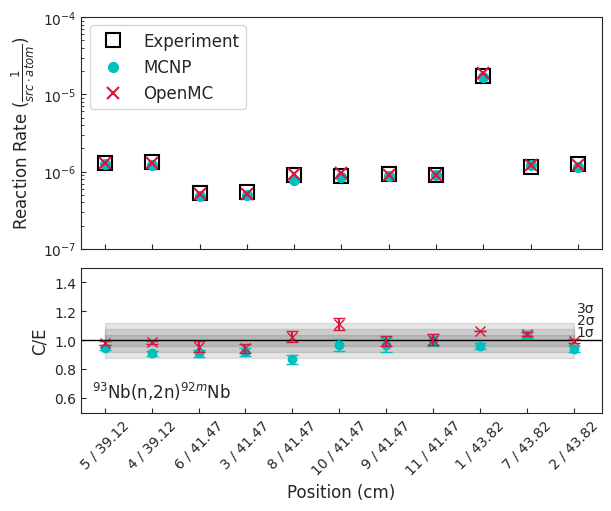

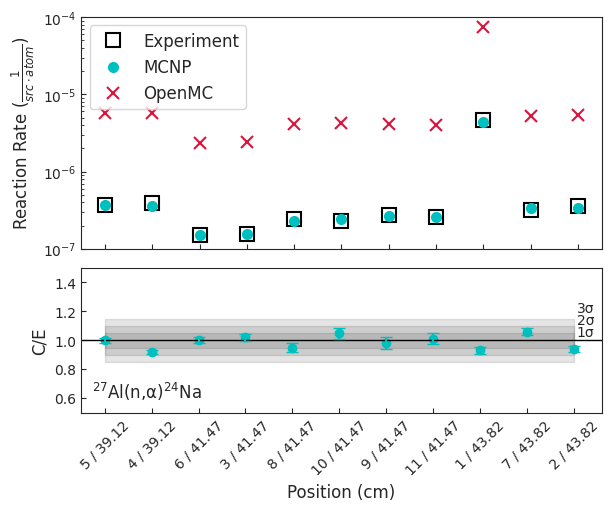

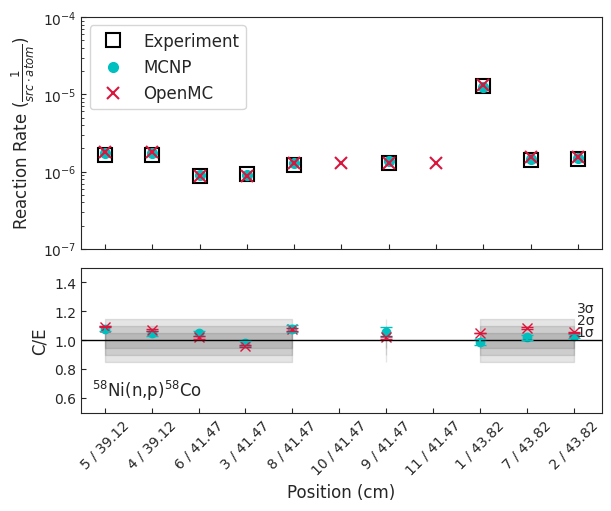

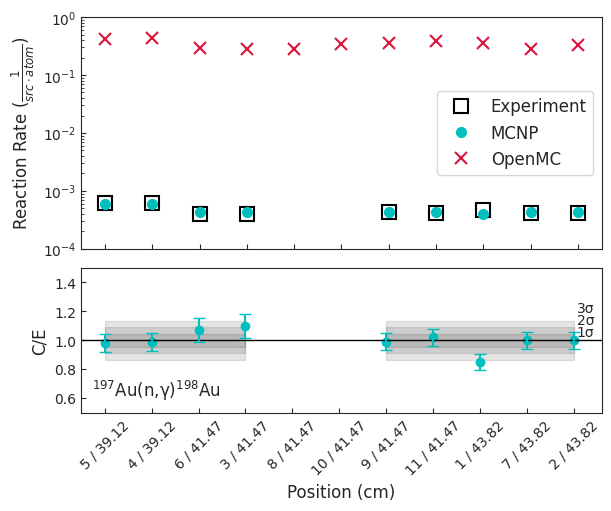

In [11]:
my_xticks = np.arange(len(tab2_measured_nb))
my_xlabels = tab2_measured_nb['Position/y(cm)']
# tab2_omc_coeff = [1/density/tab2_volumes for density in [1, 0.06222, 0.06026, 0.05901*0.05]]
tab2_omc_coeff = [1/density/tab2_volumes for density in [1, 1, 1, 1]]

tab2_measured = [tab2_measured_nb, tab2_measured_al, tab2_measured_ni, tab2_measured_au]
tab2_mcnp = [tab2_mcnp_nb, tab2_mcnp_al, tab2_mcnp_ni, tab2_mcnp_au]
tab2_omc = [tab2_omc_nb, tab2_omc_al, tab2_omc_ni, tab2_omc_au]
reaction_labels = ['$^{93}$Nb(n,2n)$^{92m}$Nb', '$^{27}$Al(n,\u03B1)$^{24}$Na', '$^{58}$Ni(n,p)$^{58}$Co', '$^{197}$Au(n,\u03B3)$^{198}$Au']
filename_label = ['nb', 'al', 'ni', 'au']

for i,coeff in enumerate(tab2_omc_coeff):

    # get all values in plot-friendly format
    exp_mean = np.array(tab2_measured[i]['E'])
    exp_stddev = np.array(tab2_measured[i]['Error on E'])
    exp_rstddev = np.array(tab2_measured[i]['Error on E']/tab2_measured[i]['E'])
    mcnp_mean = np.array(tab2_mcnp[i]['C FENDL-1'])
    mcnp_stddev = np.array(tab2_mcnp[i]['FENDL-1 err'])
    mcnp_rstddev = mcnp_stddev / mcnp_mean
    mcnp_ce = np.array(tab2_mcnp[i]['C/E FEN-1'])
    omc_mean = np.array(tab2_omc[i]['mean'])*coeff
    omc_stddev = np.array(tab2_omc[i]['std. dev.'])*coeff
    omc_rstddev = omc_stddev / omc_mean
    omc_ce = omc_mean / exp_mean

    # min value and max value for rr floor and ceiling
    min_value = min(np.nanmin(exp_mean), np.nanmin(mcnp_mean), np.nanmin(omc_mean))
    max_value = max(np.nanmax(exp_mean), np.nanmax(mcnp_mean), np.nanmax(omc_mean))
    min_oom = orderOfMagnitude(min_value)
    max_oom = orderOfMagnitude(max_value)
    floor = 10**(min_oom)
    ceiling = 10**(max_oom+1)

    # get index of last valied value for measured data for placing 1,2,3sigma strings near the grey areas
    sigma_index = (~np.isnan(exp_mean)).cumsum(0).argmax(0)
    last_sigma = exp_rstddev[sigma_index]
    sigma_start = 1.

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
    ax1.plot(my_xticks, exp_mean, marker='s', ms=10, ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')
    ax1.plot(my_xticks, mcnp_mean, marker='o', ms=7, ls='none', alpha=1, color='c', label='MCNP')
    ax1.plot(my_xticks, omc_mean, marker='x', ms=8, mew=1.5, ls='none', color='crimson', zorder=4, label='OpenMC')
    ax1.set_yscale('log')
    ax1.set_ylim([floor, ceiling])

    # # gridlines
    # ax1.grid(True, which="both", axis='y', ls="-")
    # locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1), numticks=10)  
    # ax1.xaxis.set_minor_locator(locmin)

    ax1.set_xticks(my_xticks)
    ax1.tick_params(axis='x', labelbottom=False)
    ax1.tick_params(axis='both', which='both', direction='in')
    ax1.legend(frameon=True, fontsize=12)
    ax1.set_ylabel(r'Reaction Rate $(\frac{1}{src \cdot atom})$', fontsize=12)
    #
    ax2.fill_between(my_xticks, 1 - exp_rstddev, 1 + exp_rstddev, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 2*exp_rstddev, 1 + 2*exp_rstddev, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 3*exp_rstddev, 1 + 3*exp_rstddev, color='k', alpha=.1)
    if last_sigma < .08:
        last_sigma = .08
        sigma_start = .95
    ax2.annotate('1\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 1*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('2\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 2*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('3\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 3*last_sigma], fontsize=10, clip_on=False)
    ax2.hlines(1.0, -1, 20, colors='k', linestyles='-', linewidth=1, label='_nolegend_')
    ax2.errorbar(my_xticks, mcnp_ce, mcnp_rstddev*mcnp_ce, marker='o', ms=6, capsize=4, barsabove=True, color='c', ls='none', label='_mcnp')
    ax2.errorbar(my_xticks, omc_ce, omc_rstddev*omc_ce, marker='x', ms=7, capsize=4, barsabove=True, color='crimson', ls='none', label='_openmc')
    ax2.set_xlim([-0.5, my_xticks[-1] + .6])
    ax2.set_ylim([0.5, 1.5])
    ax2.set_xticks(np.arange(len(my_xticks)))
    ax2.set_xticklabels(my_xlabels)
    ax2.tick_params(axis='x', labelrotation = 45)
    ax2.tick_params(axis='both', which='both', direction='in')
    ax2.set_xlabel('Position (cm)', fontsize=12)
    ax2.set_ylabel('C/E', fontsize=12)
    ax2.annotate(reaction_labels[i], [0.02, 0.07], xycoords='axes fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=12)
    # plt.savefig('tab2_' + filename_label[i] + '.png', format="png")

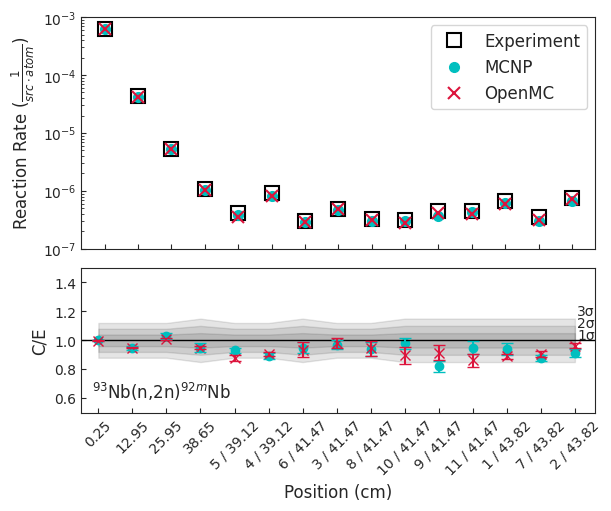

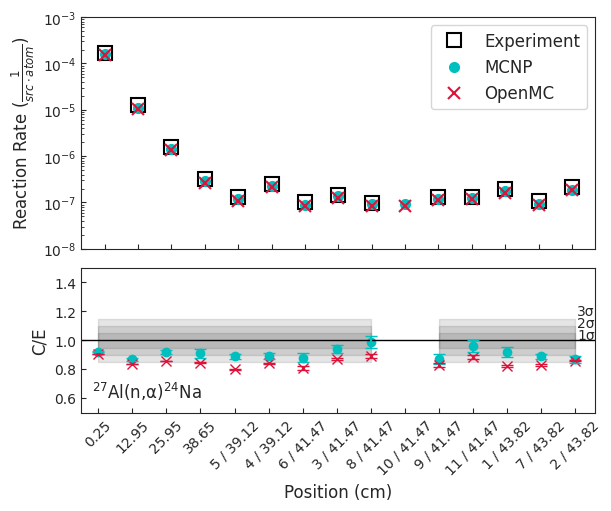

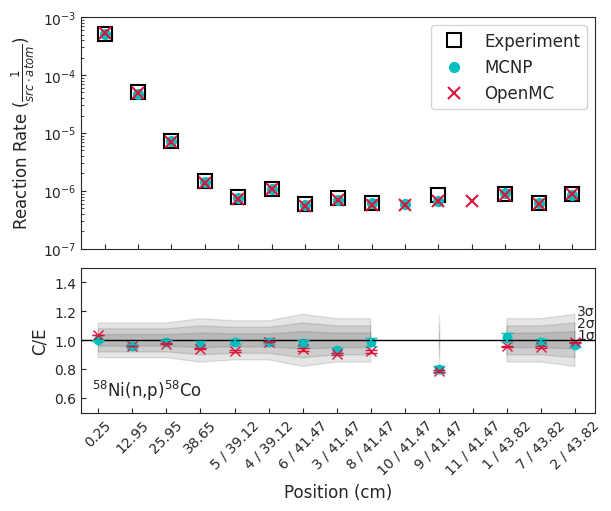

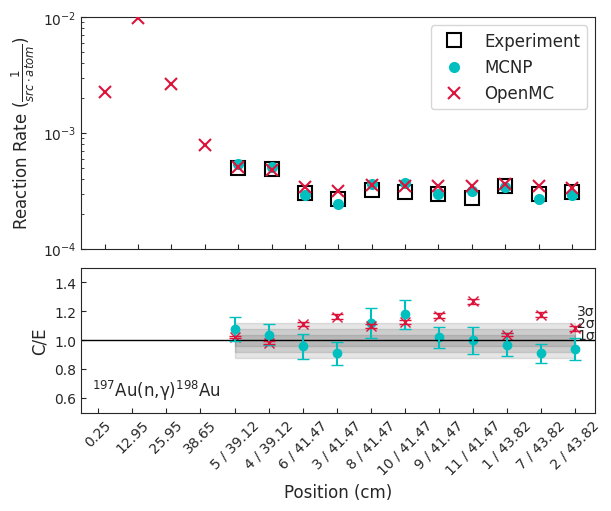

In [12]:
my_xticks = np.arange(len(tab3_measured_nb))
my_xlabels = tab3_measured_nb['Position/y(cm)']
tab3_omc_coeff = [1/density/tab3_volumes for density in [1, 0.06222, 0.06026, 0.05901*0.05]]

tab3_measured = [tab3_measured_nb, tab3_measured_al, tab3_measured_ni, tab3_measured_au]
tab3_mcnp = [tab3_mcnp_nb, tab3_mcnp_al, tab3_mcnp_ni, tab3_mcnp_au]
tab3_omc = [tab3_omc_nb, tab3_omc_al, tab3_omc_ni, tab3_omc_au]
reaction_labels = ['$^{93}$Nb(n,2n)$^{92m}$Nb', '$^{27}$Al(n,\u03B1)$^{24}$Na', '$^{58}$Ni(n,p)$^{58}$Co', '$^{197}$Au(n,\u03B3)$^{198}$Au']
filename_label = ['nb', 'al', 'ni', 'au']

for i,coeff in enumerate(tab3_omc_coeff):

    # get all values in plot-friendly format
    exp_mean = np.array(tab3_measured[i]['E'])
    exp_stddev = np.array(tab3_measured[i]['Error on E'])
    exp_rstddev = np.array(tab3_measured[i]['Error on E']/tab3_measured[i]['E'])
    mcnp_mean = np.array(tab3_mcnp[i]['C FENDL-1'])
    mcnp_stddev = np.array(tab3_mcnp[i]['FENDL-1 err'])
    mcnp_rstddev = mcnp_stddev / mcnp_mean
    mcnp_ce = np.array(tab3_mcnp[i]['C/E FEN-1'])
    omc_mean = np.array(tab3_omc[i]['mean'])*coeff
    omc_stddev = np.array(tab3_omc[i]['std. dev.'])*coeff
    omc_rstddev = omc_stddev / omc_mean
    omc_ce = omc_mean / exp_mean

    # min value and max value for rr floor and ceiling
    min_value = min(np.nanmin(exp_mean), np.nanmin(mcnp_mean), np.nanmin(omc_mean))
    max_value = max(np.nanmax(exp_mean), np.nanmax(mcnp_mean), np.nanmax(omc_mean))
    min_oom = orderOfMagnitude(min_value)
    max_oom = orderOfMagnitude(max_value)
    floor = 10**(min_oom)
    ceiling = 10**(max_oom+1)

    # get index of last valied value for measured data for placing 1,2,3sigma strings near the grey areas
    sigma_index = (~np.isnan(exp_mean)).cumsum(0).argmax(0)
    last_sigma = exp_rstddev[sigma_index]
    sigma_start = 1.

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
    ax1.plot(my_xticks, exp_mean, marker='s', ms=10, ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')
    ax1.plot(my_xticks, mcnp_mean, marker='o', ms=7, ls='none', alpha=1, color='c', label='MCNP')
    ax1.plot(my_xticks, omc_mean, marker='x', ms=8, mew=1.5, ls='none', color='crimson', zorder=4, label='OpenMC')
    ax1.set_yscale('log')
    ax1.set_ylim([floor, ceiling])

    # # gridlines
    # ax1.grid(True, which="both", axis='y', ls="-")
    # locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1), numticks=10)  
    # ax1.xaxis.set_minor_locator(locmin)

    ax1.set_xticks(my_xticks)
    ax1.tick_params(axis='x', labelbottom=False)
    ax1.tick_params(axis='both', which='both', direction='in')
    ax1.legend(frameon=True, fontsize=12)
    ax1.set_ylabel(r'Reaction Rate $(\frac{1}{src \cdot atom})$', fontsize=12)
    #
    ax2.fill_between(my_xticks, 1 - exp_rstddev, 1 + exp_rstddev, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 2*exp_rstddev, 1 + 2*exp_rstddev, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 3*exp_rstddev, 1 + 3*exp_rstddev, color='k', alpha=.1)
    if last_sigma < .08:
        last_sigma = .08
        sigma_start = .93
    ax2.annotate('1\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 1*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('2\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 2*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('3\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 3*last_sigma], fontsize=10, clip_on=False)
    ax2.hlines(1.0, -1, 20, colors='k', linestyles='-', linewidth=1, label='_nolegend_')
    ax2.errorbar(my_xticks, mcnp_ce, mcnp_rstddev*mcnp_ce, marker='o', ms=6, capsize=4, barsabove=True, color='c', ls='none', label='_mcnp')
    ax2.errorbar(my_xticks, omc_ce, omc_rstddev*omc_ce, marker='x', ms=7, capsize=4, barsabove=True, color='crimson', ls='none', label='_openmc')
    ax2.set_xlim([-0.5, my_xticks[-1] + .6])
    ax2.set_ylim([0.5, 1.5])
    ax2.set_xticks(np.arange(len(my_xticks)))
    ax2.set_xticklabels(my_xlabels)
    ax2.tick_params(axis='x', labelrotation = 45)
    ax2.tick_params(axis='both', which='both', direction='in')
    ax2.set_xlabel('Position (cm)', fontsize=12)
    ax2.set_ylabel('C/E', fontsize=12)
    ax2.annotate(reaction_labels[i], [0.02, 0.07], xycoords='axes fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=12)
    # plt.savefig('tab3_' + filename_label[i] + '.png', format="png")

In [13]:

cells = [239, 262, 285, 308, 331, 363, 386, 398, 500, 507, 514, 521]
ev2gy = 1.60217733e-16
omc_qn = []
omc_qp = []
for c in cells:
    c_heating = heating_omc.loc[heating_omc['cell'] == c]

    if c in (239, 262, 285, 308):
        vol = 1.8**2 * np.pi/4 * .1 * 2
    elif c in (331, 363, 386, 398):
        vol = 1.8**2 * np.pi/4 * .1 * 3
    elif c in (500, 507, 514, 521):
        vol = 4/3 * np.pi * .8**3
    
    if c in (507, 521):
        dens = 8.94  # g/cm3 - copper
    else:
        dens = 7.89  # g/cm3 - aisi361

    c_heating_mean = np.array(c_heating['mean']) /vol/dens*ev2gy
    n_heating_mean = c_heating_mean[0]
    p_heating_mean = sum(c_heating_mean[1:])

    c_heating_stddev = np.array(c_heating['std. dev.']) /vol/dens*ev2gy
    n_heating_stddev = c_heating_stddev[0]
    p_heating_stddev = sum(c_heating_stddev[1:])

    omc_qn.append([n_heating_mean, n_heating_stddev])
    omc_qp.append([p_heating_mean, p_heating_stddev])

omc_qn = np.array(omc_qn).T.reshape(2,12)
omc_qp = np.array(omc_qp).T.reshape(2,12)

In [14]:
# extract qtld cs, ce, cp coefficients
ce = np.array(heating_mcnp_fendl2['Ce'])
cn = np.array(heating_mcnp_fendl2['Cn'])
cp = np.array(heating_mcnp_fendl2['Cp'])

omc_qtld = [omc_qn[i] * cn * ce + qp * cp for i,qp in enumerate(omc_qp)]

Text(0, 0.5, 'C/E')

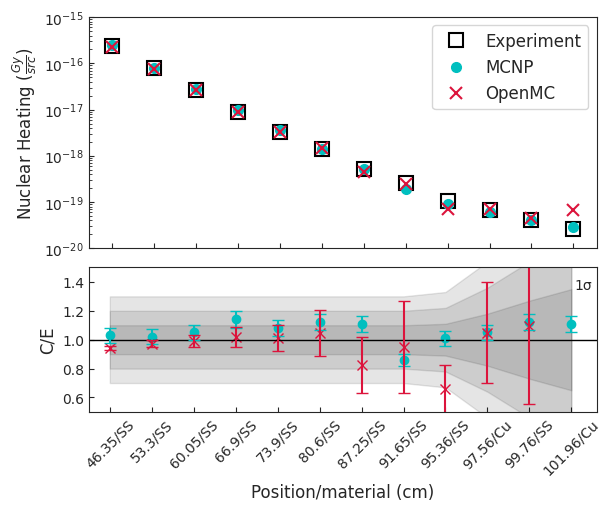

In [15]:
my_xticks = np.arange(len(heating_measured))
my_xlabels = heating_measured['y(cm)']

# get all values in plot-friendly format
exp_mean = np.array(heating_measured['E'])
exp_stddev = np.array(heating_measured['Error on E'])
exp_rstddev = np.array(heating_measured['Error on E']/heating_measured['E'])
mcnp_mean = np.array(heating_mcnp_fendl2['QTLD - C'])
mcnp_stddev = mcnp_mean * .05
mcnp_rstddev = mcnp_stddev / mcnp_mean
mcnp_ce = np.array(heating_mcnp_fendl2['C/E'])
omc_mean = omc_qtld[0]
omc_stddev = omc_qtld[1]
omc_rstddev = omc_stddev / omc_mean
omc_ce = omc_mean / exp_mean

# min value and max value for rr floor and ceiling
min_value = min(np.nanmin(exp_mean), np.nanmin(mcnp_mean), np.nanmin(omc_mean))
max_value = max(np.nanmax(exp_mean), np.nanmax(mcnp_mean), np.nanmax(omc_mean))
min_oom = orderOfMagnitude(min_value)
max_oom = orderOfMagnitude(max_value)
floor = 10**(min_oom)
ceiling = 10**(max_oom+1)

# get index of last valied value for measured data for placing 1,2,3sigma strings near the grey areas
sigma_index = (~np.isnan(exp_mean)).cumsum(0).argmax(0)
last_sigma = exp_rstddev[sigma_index]
sigma_start = 1.

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
#
ax1.plot(my_xticks, exp_mean, marker='s', ms=10, ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')
ax1.plot(my_xticks, mcnp_mean, marker='o', ms=7, ls='none', alpha=1, color='c', label='MCNP')
ax1.plot(my_xticks, omc_mean, marker='x', ms=8, mew=1.5, ls='none', color='crimson', zorder=4, label='OpenMC')
ax1.set_yscale('log')
ax1.set_ylim([floor, ceiling])

# # gridlines
# ax1.grid(True, which="both", axis='y', ls="-")
# locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1), numticks=10)  
# ax1.xaxis.set_minor_locator(locmin)

ax1.set_xticks(my_xticks)
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='both', which='both', direction='in')
ax1.legend(frameon=True, fontsize=12)
ax1.set_ylabel(r'Nuclear Heating $(\frac{Gy}{src})$', fontsize=12)
#
ax2.fill_between(my_xticks, 1 - exp_rstddev, 1 + exp_rstddev, color='k', alpha=.1)
ax2.fill_between(my_xticks, 1 - 2*exp_rstddev, 1 + 2*exp_rstddev, color='k', alpha=.1)
ax2.fill_between(my_xticks, 1 - 3*exp_rstddev, 1 + 3*exp_rstddev, color='k', alpha=.1)
if last_sigma < .08:
    last_sigma = .08
    sigma_start = .93
ax2.annotate('1\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 1*last_sigma], fontsize=10, clip_on=False)
ax2.annotate('2\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 2*last_sigma], fontsize=10, clip_on=False)
ax2.annotate('3\u03C3', [my_xticks[sigma_index] + 0.07, sigma_start + 3*last_sigma], fontsize=10, clip_on=False)
ax2.hlines(1.0, -1, 20, colors='k', linestyles='-', linewidth=1, label='_nolegend_')
ax2.errorbar(my_xticks, mcnp_ce, mcnp_rstddev*mcnp_ce, marker='o', ms=6, capsize=4, barsabove=True, color='c', ls='none', label='_mcnp')
ax2.errorbar(my_xticks, omc_ce, omc_rstddev*omc_ce, marker='x', ms=7, capsize=4, barsabove=True, color='crimson', ls='none', label='_openmc')
ax2.set_xlim([-0.5, my_xticks[-1] + .6])
ax2.set_ylim([0.5, 1.5])
ax2.set_xticks(np.arange(len(my_xticks)))
ax2.set_xticklabels(my_xlabels)
ax2.tick_params(axis='x', labelrotation = 45)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.set_xlabel('Position/material (cm)', fontsize=12)
ax2.set_ylabel('C/E', fontsize=12)
# plt.savefig('heating.png', format="png")